# Cleaning Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv('./diamonds-datamad0321/train.csv')

In [3]:
diamonds.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
diamonds.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

Most of our data is numeric except color,  clarity, and cut. 

In [5]:
diamonds.color.value_counts()

G    8462
E    7308
F    7213
H    6201
D    5010
I    4134
J    2127
Name: color, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

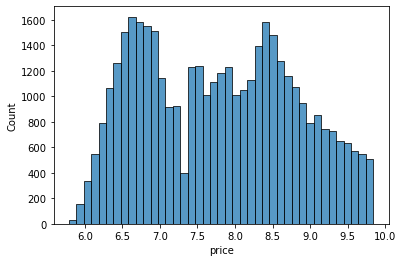

In [6]:
sns.histplot(diamonds.price)

<AxesSubplot:>

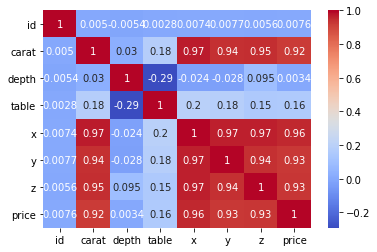

In [7]:
sns.heatmap(diamonds.corr(), annot = True , cmap = 'coolwarm')

<AxesSubplot:>

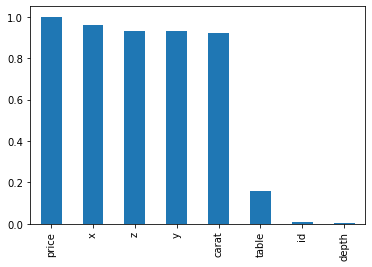

In [8]:
corr_price = diamonds.corr()['price']
corr_price.sort_values(ascending = False).plot(kind = 'bar')

As we can see, the variables the depth variable has verry little correlation with the price, we will keep this in mind when creating our model. Color seems to have a negative correlation with price of -16% and table has a positive correlation of 16%

In [9]:
#We select all the categorical columns in our dataframe
categorical = diamonds.select_dtypes(include = ['object']).columns.tolist()
categorical

['cut', 'color', 'clarity']

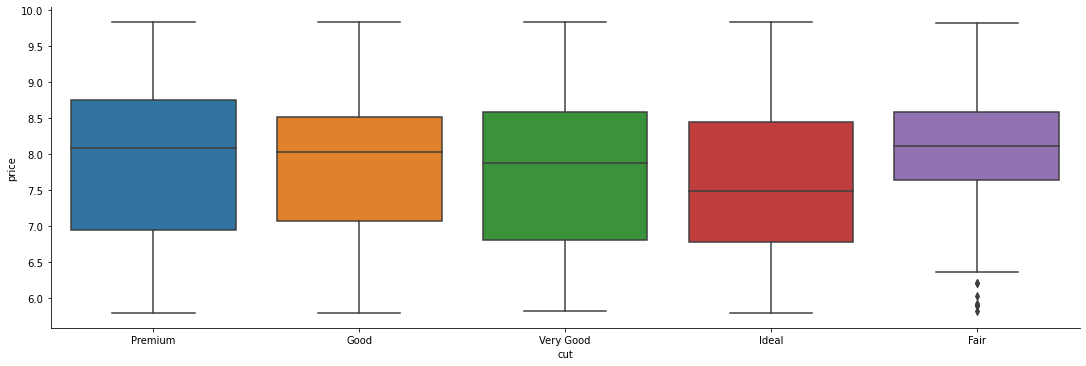

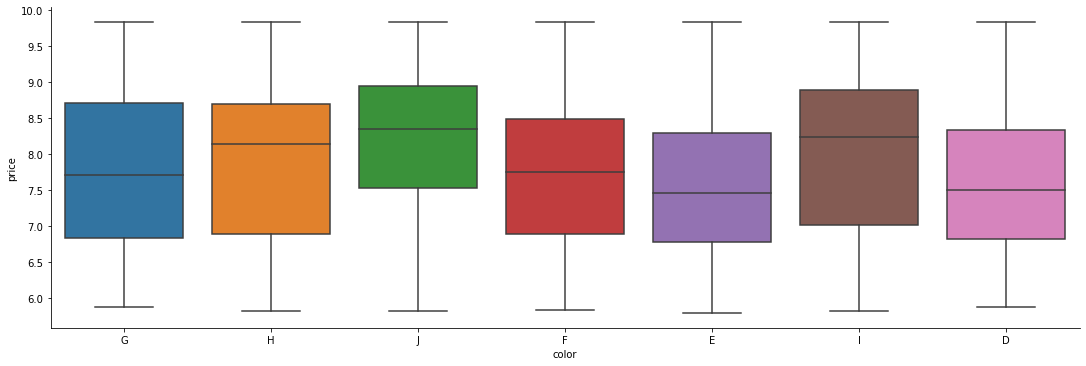

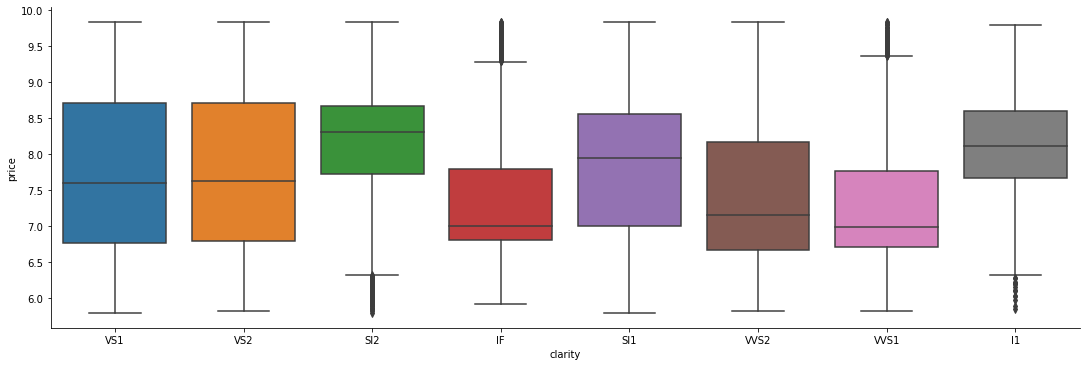

In [10]:
#We create a box plot
for col in categorical:
    sns.catplot(x=col, y="price", kind = 'box', dodge = False, height = 5, aspect = 3,data=diamonds)

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


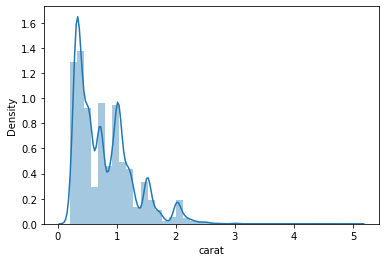

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


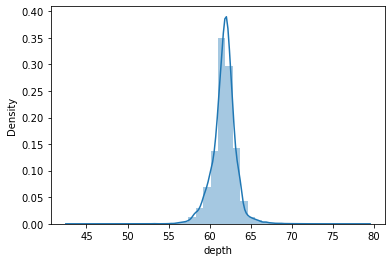

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


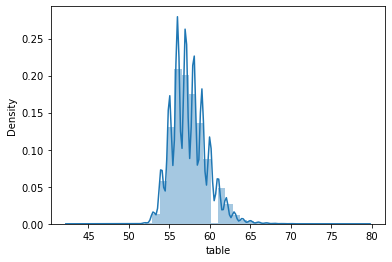

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


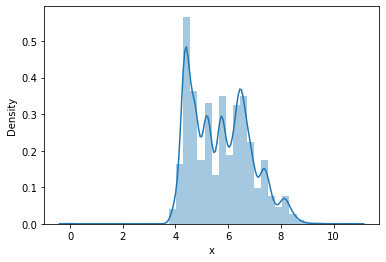

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


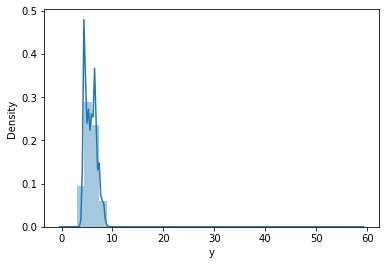

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


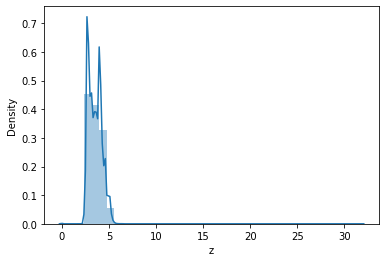

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


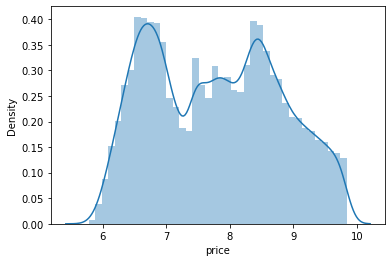

In [11]:
numerical = diamonds.select_dtypes(include = ['int64', 'float64']).columns.tolist()

for col in numerical[1:9]:
    sns.distplot(diamonds[col], kde=True, bins=40)
    plt.show()


### As we can see most of our values are not Gausianly distributed, therefore standardization won't help us deal with different ranges in our data (except for the depth column)

# How colors affect diamond grade:

In the diamond world near colorlessness means a more valuable diamond. Here is how the scale works (7 being the most colorless)
1. J
2. I
3. H
4. G
5. F
6. E
7. D

We are going to change this column of categorical variables into ordinal ones, that represent the order of value in the diamonds color.

In [12]:
dicc_color = { 'J': 1, 'I': 2, 'H': 3, 'G':4 , 'F' : 5, 'E': 6, 'D': 7}

In [13]:
diamonds.color = diamonds.color.map(dicc_color)

In [14]:
diamonds[diamonds['color'] == 7]

,id,carat,cut,color,clarity,depth,table,x,y,z,price
48,48,0.30,Premium,7,SI1,62.6,59.0,4.27,4.23,2.66,6.564
51,51,0.30,Premium,7,SI1,63.0,58.0,4.27,4.24,2.68,6.564
62,62,1.03,Ideal,7,SI1,61.6,55.0,6.49,6.53,4.01,8.666
65,65,0.51,Ideal,7,VS2,61.9,57.0,5.09,5.15,3.17,7.488
68,68,1.52,Premium,7,SI2,59.8,60.0,7.50,7.42,4.46,9.271
...,...,...,...,...,...,...,...,...,...,...,...
40403,40403,0.73,Very Good,7,SI1,63.6,57.0,5.68,5.71,3.62,7.843
40420,40420,0.34,Ideal,7,IF,62.1,57.0,4.46,4.52,2.79,7.735
40422,40422,0.90,Very Good,7,SI1,61.5,58.0,6.15,6.21,3.80,8.385
40432,40432,0.38,Very Good,7,SI2,61.1,58.0,4.62,4.68,2.84,6.450


<AxesSubplot:>

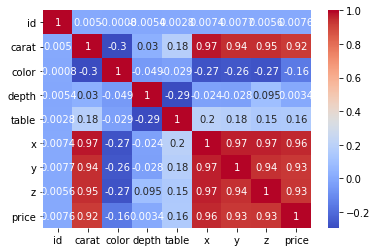

In [15]:
sns.heatmap(diamonds.corr(), annot = True , cmap = 'coolwarm')

<AxesSubplot:>

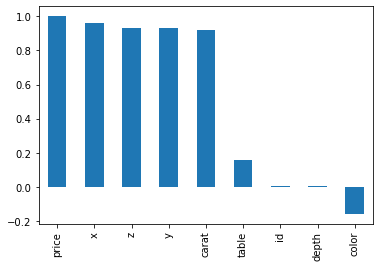

In [16]:
corr_price = diamonds.corr()['price']
corr_price.sort_values(ascending = False).plot(kind = 'bar')

# How cut affects diamond quality:

cut is an important factor when looking at diamond quality. We don't know if this variable has any type of order so we will use one-hot encoding to assign a variable to each with a value from 1 to 0

1. Fair, 
2. Good, 
3. Very Good, 
4. Premium, 
5. Ideal

In [17]:
diamonds.cut.unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [18]:
#we create a dictionary for ordinal ordering of the cut column, we will seee if we need to use it later
dic_cut = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5 }

In [19]:
diamonds.cut = diamonds.cut.map(dic_cut)

<AxesSubplot:>

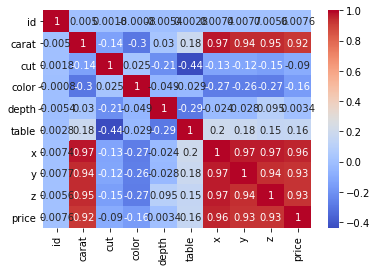

In [20]:
sns.heatmap(diamonds.corr(), annot = True , cmap = 'coolwarm')

<AxesSubplot:>

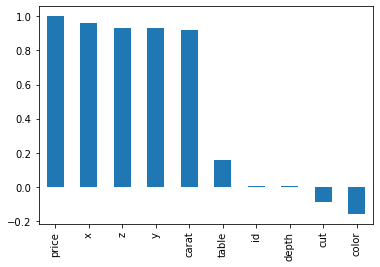

In [21]:
corr_price = diamonds.corr()['price']
corr_price.sort_values(ascending = False).plot(kind = 'bar')

as we can see, cut has a low correlation to 

# Transforming the clarity column

In [22]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [23]:
diamonds_clarity = onehotencoder.fit_transform(diamonds['clarity'].values.reshape(-1,1)).toarray()

In [24]:
labels = [str(a) for a in list(diamonds.clarity.unique())]

In [25]:
diamonds[labels] = pd.DataFrame(diamonds_clarity,index = diamonds.index)

In [26]:
diamonds

,id,carat,cut,color,clarity,depth,table,x,y,z,price,VS1,VS2,SI2,IF,SI1,VVS2,VVS1,I1
0,0,1.01,4,4,VS1,62.7,58.0,6.36,6.31,3.97,8.754,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.60,2,4,VS2,64.3,57.0,5.31,5.38,3.43,7.492,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.60,4,3,SI2,59.4,59.0,7.55,7.60,4.50,9.010,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.30,3,1,VS1,63.5,58.0,4.27,4.24,2.70,6.227,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1.00,3,5,SI2,62.8,57.0,6.37,6.44,4.02,8.314,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,5,6,VS2,62.5,55.0,5.08,5.13,3.19,7.412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40451,40451,0.80,5,3,VS2,62.1,54.0,5.96,5.99,3.71,8.016,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,40452,1.53,4,4,SI2,58.7,59.0,7.51,7.45,4.39,9.070,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40453,40453,1.51,5,2,VS2,61.6,54.0,7.38,7.42,4.57,9.199,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
diamonds = diamonds.drop('clarity', axis = 1)

In [30]:
#Now we have only numerical values
diamonds

,id,carat,cut,color,depth,table,x,y,z,price,VS1,VS2,SI2,IF,SI1,VVS2,VVS1,I1
0,0,1.01,4,4,62.7,58.0,6.36,6.31,3.97,8.754,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.60,2,4,64.3,57.0,5.31,5.38,3.43,7.492,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.60,4,3,59.4,59.0,7.55,7.60,4.50,9.010,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.30,3,1,63.5,58.0,4.27,4.24,2.70,6.227,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1.00,3,5,62.8,57.0,6.37,6.44,4.02,8.314,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,5,6,62.5,55.0,5.08,5.13,3.19,7.412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40451,40451,0.80,5,3,62.1,54.0,5.96,5.99,3.71,8.016,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,40452,1.53,4,4,58.7,59.0,7.51,7.45,4.39,9.070,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40453,40453,1.51,5,2,61.6,54.0,7.38,7.42,4.57,9.199,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Standarizing the Depth Column

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
diamonds['depth'] = scaler.fit_transform(diamonds["depth"].values.reshape(-1,1))

In [34]:
diamonds.depth

0        0.663492
1        1.776841
2       -1.632789
3        1.220167
4        0.733077
           ...   
40450    0.524324
40451    0.245987
40452   -2.119879
40453   -0.101935
40454    0.245987
Name: depth, Length: 40455, dtype: float64

# Train, Test, Split

In [163]:
diamonds.dtypes

id         int64
carat    float64
cut        int64
color      int64
depth    float64
table    float64
x        float64
y        float64
z        float64
price    float64
VS1      float64
VS2      float64
SI2      float64
IF       float64
SI1      float64
VVS2     float64
VVS1     float64
I1       float64
dtype: object

In [121]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [164]:
X = diamonds.drop(['price', 'id'], axis = 1)
X

,carat,cut,color,depth,table,x,y,z,VS1,VS2,SI2,IF,SI1,VVS2,VVS1,I1
0,1.01,4,4,0.663492,58.0,6.36,6.31,3.97,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.60,2,4,1.776841,57.0,5.31,5.38,3.43,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.60,4,3,-1.632789,59.0,7.55,7.60,4.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.30,3,1,1.220167,58.0,4.27,4.24,2.70,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.00,3,5,0.733077,57.0,6.37,6.44,4.02,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,0.51,5,6,0.524324,55.0,5.08,5.13,3.19,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40451,0.80,5,3,0.245987,54.0,5.96,5.99,3.71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40452,1.53,4,4,-2.119879,59.0,7.51,7.45,4.39,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40453,1.51,5,2,-0.101935,54.0,7.38,7.42,4.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [166]:
y = diamonds['price']


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state= 60)

# Testing Algorithms

### Random Forest Regressor 1

In [170]:
X_train.shape

(33173, 16)

In [171]:
y.shape

(40455,)

In [172]:
RFG = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=10)

In [173]:
RFG.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=10)

In [92]:
from sklearn.metrics import r2_score

In [174]:
rf_mse_score = mean_squared_error(
    y_pred=RFG.predict(X_test),
    y_true=y_test,
)

In [176]:
rf_mse_score

0.012743961150039049

# Adjusting Parameters in our Random Forest

In [177]:
from sklearn.model_selection import GridSearchCV

In [193]:
X_train.shape

(33173, 16)

In [184]:
gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        "max_depth": [10, 11, 12, 13],
        "min_samples_split": [20, 30, 50, 100],
        "max_features": [9, 11, 14, 15]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [185]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] max_depth=10, max_features=9, min_samples_split=20 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=9, min_samples_split=20, score=(train=-0.012, test=-0.014), total=   3.9s
[CV] max_depth=10, max_features=9, min_samples_split=20 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  max_depth=10, max_features=9, min_samples_split=20, score=(train=-0.012, test=-0.014), total=   3.4s
[CV] max_depth=10, max_features=9, min_samples_split=20 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s


[CV]  max_depth=10, max_features=9, min_samples_split=20, score=(train=-0.012, test=-0.014), total=   3.7s
[CV] max_depth=10, max_features=9, min_samples_split=20 ..............
[CV]  max_depth=10, max_features=9, min_samples_split=20, score=(train=-0.012, test=-0.015), total=   3.7s
[CV] max_depth=10, max_features=9, min_samples_split=20 ..............
[CV]  max_depth=10, max_features=9, min_samples_split=20, score=(train=-0.012, test=-0.013), total=   3.3s
[CV] max_depth=10, max_features=9, min_samples_split=30 ..............
[CV]  max_depth=10, max_features=9, min_samples_split=30, score=(train=-0.012, test=-0.014), total=   3.4s
[CV] max_depth=10, max_features=9, min_samples_split=30 ..............
[CV]  max_depth=10, max_features=9, min_samples_split=30, score=(train=-0.012, test=-0.014), total=   4.0s
[CV] max_depth=10, max_features=9, min_samples_split=30 ..............
[CV]  max_depth=10, max_features=9, min_samples_split=30, score=(train=-0.012, test=-0.014), total=   3.4s
[CV

[CV]  max_depth=10, max_features=14, min_samples_split=30, score=(train=-0.012, test=-0.014), total=   5.1s
[CV] max_depth=10, max_features=14, min_samples_split=30 .............
[CV]  max_depth=10, max_features=14, min_samples_split=30, score=(train=-0.012, test=-0.013), total=   4.7s
[CV] max_depth=10, max_features=14, min_samples_split=50 .............
[CV]  max_depth=10, max_features=14, min_samples_split=50, score=(train=-0.012, test=-0.015), total=   5.1s
[CV] max_depth=10, max_features=14, min_samples_split=50 .............
[CV]  max_depth=10, max_features=14, min_samples_split=50, score=(train=-0.012, test=-0.014), total=   4.6s
[CV] max_depth=10, max_features=14, min_samples_split=50 .............
[CV]  max_depth=10, max_features=14, min_samples_split=50, score=(train=-0.012, test=-0.013), total=   4.8s
[CV] max_depth=10, max_features=14, min_samples_split=50 .............
[CV]  max_depth=10, max_features=14, min_samples_split=50, score=(train=-0.012, test=-0.015), total=   6.

[CV]  max_depth=11, max_features=9, min_samples_split=50, score=(train=-0.011, test=-0.012), total=   3.6s
[CV] max_depth=11, max_features=9, min_samples_split=100 .............
[CV]  max_depth=11, max_features=9, min_samples_split=100, score=(train=-0.013, test=-0.015), total=   3.1s
[CV] max_depth=11, max_features=9, min_samples_split=100 .............
[CV]  max_depth=11, max_features=9, min_samples_split=100, score=(train=-0.013, test=-0.014), total=   3.2s
[CV] max_depth=11, max_features=9, min_samples_split=100 .............
[CV]  max_depth=11, max_features=9, min_samples_split=100, score=(train=-0.013, test=-0.014), total=   3.6s
[CV] max_depth=11, max_features=9, min_samples_split=100 .............
[CV]  max_depth=11, max_features=9, min_samples_split=100, score=(train=-0.013, test=-0.015), total=   3.9s
[CV] max_depth=11, max_features=9, min_samples_split=100 .............
[CV]  max_depth=11, max_features=9, min_samples_split=100, score=(train=-0.013, test=-0.014), total=   3.9

[CV]  max_depth=11, max_features=15, min_samples_split=20, score=(train=-0.009, test=-0.012), total=   6.1s
[CV] max_depth=11, max_features=15, min_samples_split=20 .............
[CV]  max_depth=11, max_features=15, min_samples_split=20, score=(train=-0.009, test=-0.012), total=   5.8s
[CV] max_depth=11, max_features=15, min_samples_split=20 .............
[CV]  max_depth=11, max_features=15, min_samples_split=20, score=(train=-0.009, test=-0.011), total=   5.8s
[CV] max_depth=11, max_features=15, min_samples_split=20 .............
[CV]  max_depth=11, max_features=15, min_samples_split=20, score=(train=-0.009, test=-0.013), total=   6.6s
[CV] max_depth=11, max_features=15, min_samples_split=20 .............
[CV]  max_depth=11, max_features=15, min_samples_split=20, score=(train=-0.009, test=-0.011), total=   5.3s
[CV] max_depth=11, max_features=15, min_samples_split=30 .............
[CV]  max_depth=11, max_features=15, min_samples_split=30, score=(train=-0.010, test=-0.013), total=   5.

[CV]  max_depth=12, max_features=11, min_samples_split=30, score=(train=-0.009, test=-0.011), total=   4.7s
[CV] max_depth=12, max_features=11, min_samples_split=30 .............
[CV]  max_depth=12, max_features=11, min_samples_split=30, score=(train=-0.009, test=-0.011), total=   5.2s
[CV] max_depth=12, max_features=11, min_samples_split=30 .............
[CV]  max_depth=12, max_features=11, min_samples_split=30, score=(train=-0.009, test=-0.012), total=   5.0s
[CV] max_depth=12, max_features=11, min_samples_split=30 .............
[CV]  max_depth=12, max_features=11, min_samples_split=30, score=(train=-0.009, test=-0.011), total=   4.9s
[CV] max_depth=12, max_features=11, min_samples_split=50 .............
[CV]  max_depth=12, max_features=11, min_samples_split=50, score=(train=-0.010, test=-0.012), total=   4.2s
[CV] max_depth=12, max_features=11, min_samples_split=50 .............
[CV]  max_depth=12, max_features=11, min_samples_split=50, score=(train=-0.010, test=-0.012), total=   4.

[CV]  max_depth=12, max_features=15, min_samples_split=50, score=(train=-0.010, test=-0.011), total=   6.0s
[CV] max_depth=12, max_features=15, min_samples_split=50 .............
[CV]  max_depth=12, max_features=15, min_samples_split=50, score=(train=-0.010, test=-0.012), total=   5.7s
[CV] max_depth=12, max_features=15, min_samples_split=50 .............
[CV]  max_depth=12, max_features=15, min_samples_split=50, score=(train=-0.010, test=-0.011), total=   6.1s
[CV] max_depth=12, max_features=15, min_samples_split=100 ............
[CV]  max_depth=12, max_features=15, min_samples_split=100, score=(train=-0.012, test=-0.014), total=   5.8s
[CV] max_depth=12, max_features=15, min_samples_split=100 ............
[CV]  max_depth=12, max_features=15, min_samples_split=100, score=(train=-0.012, test=-0.013), total=   4.8s
[CV] max_depth=12, max_features=15, min_samples_split=100 ............
[CV]  max_depth=12, max_features=15, min_samples_split=100, score=(train=-0.012, test=-0.013), total=  

[CV]  max_depth=13, max_features=11, min_samples_split=100, score=(train=-0.011, test=-0.014), total=   3.7s
[CV] max_depth=13, max_features=11, min_samples_split=100 ............
[CV]  max_depth=13, max_features=11, min_samples_split=100, score=(train=-0.011, test=-0.012), total=   3.9s
[CV] max_depth=13, max_features=14, min_samples_split=20 .............
[CV]  max_depth=13, max_features=14, min_samples_split=20, score=(train=-0.007, test=-0.011), total=   6.3s
[CV] max_depth=13, max_features=14, min_samples_split=20 .............
[CV]  max_depth=13, max_features=14, min_samples_split=20, score=(train=-0.007, test=-0.010), total=   6.1s
[CV] max_depth=13, max_features=14, min_samples_split=20 .............
[CV]  max_depth=13, max_features=14, min_samples_split=20, score=(train=-0.007, test=-0.010), total=   5.6s
[CV] max_depth=13, max_features=14, min_samples_split=20 .............
[CV]  max_depth=13, max_features=14, min_samples_split=20, score=(train=-0.007, test=-0.011), total=   

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 28.3min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 11, 12, 13],
                         'max_features': [9, 11, 14, 15],
                         'min_samples_split': [20, 30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [190]:
best_tree = gs.best_estimator_
best_tree

RandomForestRegressor(max_depth=13, max_features=14, min_samples_split=20)

### Gradient Boost

In [194]:
GB = GradientBoostingRegressor()

In [195]:
GB.fit(X_train, y_train)

GradientBoostingRegressor()

In [197]:
gb_mse_score = mean_squared_error(
    y_pred=GB.predict(X_test),
    y_true=y_test,
)
gb_mse_score

0.012701601315735809

### GB Parameters

In [198]:
gb_gs = GridSearchCV(
    estimator= GradientBoostingRegressor(),
    param_grid={
        "max_depth": [11, 12, 13, 14],
        "min_samples_split": [15, 20, 25, 30],
        "max_features": [11, 14, 15, 16],
        'n_estimators' : [200, 250, 300]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)


In [199]:
gb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=11, max_features=11, min_samples_split=20, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=11, max_features=11, min_samples_split=20, n_estimators=200, score=(train=-0.010, test=-0.012), total=   8.5s
[CV] max_depth=11, max_features=11, min_samples_split=20, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV]  max_depth=11, max_features=11, min_samples_split=20, n_estimators=200, score=(train=-0.009, test=-0.012), total=   8.0s
[CV] max_depth=11, max_features=11, min_samples_split=20, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.4s remaining:    0.0s


[CV]  max_depth=11, max_features=11, min_samples_split=20, n_estimators=200, score=(train=-0.009, test=-0.012), total=   7.8s
[CV] max_depth=11, max_features=11, min_samples_split=20, n_estimators=200 
[CV]  max_depth=11, max_features=11, min_samples_split=20, n_estimators=200, score=(train=-0.009, test=-0.013), total=   8.0s
[CV] max_depth=11, max_features=11, min_samples_split=20, n_estimators=200 
[CV]  max_depth=11, max_features=11, min_samples_split=20, n_estimators=200, score=(train=-0.009, test=-0.011), total=   8.3s
[CV] max_depth=11, max_features=11, min_samples_split=20, n_estimators=250 
[CV]  max_depth=11, max_features=11, min_samples_split=20, n_estimators=250, score=(train=-0.010, test=-0.012), total=  13.0s
[CV] max_depth=11, max_features=11, min_samples_split=20, n_estimators=250 
[CV]  max_depth=11, max_features=11, min_samples_split=20, n_estimators=250, score=(train=-0.009, test=-0.012), total=  11.5s
[CV] max_depth=11, max_features=11, min_samples_split=20, n_estima

[CV]  max_depth=11, max_features=11, min_samples_split=50, n_estimators=300, score=(train=-0.011, test=-0.013), total=  11.4s
[CV] max_depth=11, max_features=11, min_samples_split=50, n_estimators=300 
[CV]  max_depth=11, max_features=11, min_samples_split=50, n_estimators=300, score=(train=-0.011, test=-0.012), total=  12.7s
[CV] max_depth=11, max_features=14, min_samples_split=20, n_estimators=200 
[CV]  max_depth=11, max_features=14, min_samples_split=20, n_estimators=200, score=(train=-0.009, test=-0.012), total=  14.2s
[CV] max_depth=11, max_features=14, min_samples_split=20, n_estimators=200 
[CV]  max_depth=11, max_features=14, min_samples_split=20, n_estimators=200, score=(train=-0.009, test=-0.011), total=   9.6s
[CV] max_depth=11, max_features=14, min_samples_split=20, n_estimators=200 
[CV]  max_depth=11, max_features=14, min_samples_split=20, n_estimators=200, score=(train=-0.009, test=-0.011), total=   8.9s
[CV] max_depth=11, max_features=14, min_samples_split=20, n_estima

[CV]  max_depth=11, max_features=14, min_samples_split=50, n_estimators=250, score=(train=-0.011, test=-0.012), total=  10.3s
[CV] max_depth=11, max_features=14, min_samples_split=50, n_estimators=300 
[CV]  max_depth=11, max_features=14, min_samples_split=50, n_estimators=300, score=(train=-0.011, test=-0.013), total=  12.4s
[CV] max_depth=11, max_features=14, min_samples_split=50, n_estimators=300 
[CV]  max_depth=11, max_features=14, min_samples_split=50, n_estimators=300, score=(train=-0.010, test=-0.012), total=  12.6s
[CV] max_depth=11, max_features=14, min_samples_split=50, n_estimators=300 
[CV]  max_depth=11, max_features=14, min_samples_split=50, n_estimators=300, score=(train=-0.010, test=-0.012), total=  12.9s
[CV] max_depth=11, max_features=14, min_samples_split=50, n_estimators=300 
[CV]  max_depth=11, max_features=14, min_samples_split=50, n_estimators=300, score=(train=-0.011, test=-0.013), total=  12.2s
[CV] max_depth=11, max_features=14, min_samples_split=50, n_estima

[CV]  max_depth=11, max_features=15, min_samples_split=50, n_estimators=250, score=(train=-0.011, test=-0.013), total=  11.9s
[CV] max_depth=11, max_features=15, min_samples_split=50, n_estimators=250 
[CV]  max_depth=11, max_features=15, min_samples_split=50, n_estimators=250, score=(train=-0.010, test=-0.012), total=  12.0s
[CV] max_depth=11, max_features=15, min_samples_split=50, n_estimators=250 
[CV]  max_depth=11, max_features=15, min_samples_split=50, n_estimators=250, score=(train=-0.010, test=-0.012), total=  15.0s
[CV] max_depth=11, max_features=15, min_samples_split=50, n_estimators=250 
[CV]  max_depth=11, max_features=15, min_samples_split=50, n_estimators=250, score=(train=-0.011, test=-0.013), total=  11.1s
[CV] max_depth=11, max_features=15, min_samples_split=50, n_estimators=250 
[CV]  max_depth=11, max_features=15, min_samples_split=50, n_estimators=250, score=(train=-0.011, test=-0.012), total=  15.1s
[CV] max_depth=11, max_features=15, min_samples_split=50, n_estima

[CV]  max_depth=11, max_features=16, min_samples_split=50, n_estimators=200, score=(train=-0.010, test=-0.012), total=   9.3s
[CV] max_depth=11, max_features=16, min_samples_split=50, n_estimators=200 
[CV]  max_depth=11, max_features=16, min_samples_split=50, n_estimators=200, score=(train=-0.010, test=-0.012), total=   9.8s
[CV] max_depth=11, max_features=16, min_samples_split=50, n_estimators=200 
[CV]  max_depth=11, max_features=16, min_samples_split=50, n_estimators=200, score=(train=-0.011, test=-0.013), total=  11.3s
[CV] max_depth=11, max_features=16, min_samples_split=50, n_estimators=200 
[CV]  max_depth=11, max_features=16, min_samples_split=50, n_estimators=200, score=(train=-0.011, test=-0.012), total=   9.8s
[CV] max_depth=11, max_features=16, min_samples_split=50, n_estimators=250 
[CV]  max_depth=11, max_features=16, min_samples_split=50, n_estimators=250, score=(train=-0.011, test=-0.014), total=  11.7s
[CV] max_depth=11, max_features=16, min_samples_split=50, n_estima

[CV]  max_depth=12, max_features=11, min_samples_split=30, n_estimators=300, score=(train=-0.009, test=-0.011), total=  11.8s
[CV] max_depth=12, max_features=11, min_samples_split=30, n_estimators=300 
[CV]  max_depth=12, max_features=11, min_samples_split=30, n_estimators=300, score=(train=-0.009, test=-0.012), total=  12.0s
[CV] max_depth=12, max_features=11, min_samples_split=30, n_estimators=300 
[CV]  max_depth=12, max_features=11, min_samples_split=30, n_estimators=300, score=(train=-0.009, test=-0.011), total=  10.9s
[CV] max_depth=12, max_features=11, min_samples_split=50, n_estimators=200 
[CV]  max_depth=12, max_features=11, min_samples_split=50, n_estimators=200, score=(train=-0.010, test=-0.012), total=   7.2s
[CV] max_depth=12, max_features=11, min_samples_split=50, n_estimators=200 
[CV]  max_depth=12, max_features=11, min_samples_split=50, n_estimators=200, score=(train=-0.010, test=-0.012), total=   7.0s
[CV] max_depth=12, max_features=11, min_samples_split=50, n_estima

[CV]  max_depth=12, max_features=14, min_samples_split=30, n_estimators=250, score=(train=-0.008, test=-0.012), total=  13.9s
[CV] max_depth=12, max_features=14, min_samples_split=30, n_estimators=250 
[CV]  max_depth=12, max_features=14, min_samples_split=30, n_estimators=250, score=(train=-0.009, test=-0.011), total=  12.0s
[CV] max_depth=12, max_features=14, min_samples_split=30, n_estimators=300 
[CV]  max_depth=12, max_features=14, min_samples_split=30, n_estimators=300, score=(train=-0.009, test=-0.012), total=  15.9s
[CV] max_depth=12, max_features=14, min_samples_split=30, n_estimators=300 
[CV]  max_depth=12, max_features=14, min_samples_split=30, n_estimators=300, score=(train=-0.008, test=-0.011), total=  15.8s
[CV] max_depth=12, max_features=14, min_samples_split=30, n_estimators=300 
[CV]  max_depth=12, max_features=14, min_samples_split=30, n_estimators=300, score=(train=-0.008, test=-0.011), total=  14.7s
[CV] max_depth=12, max_features=14, min_samples_split=30, n_estima

[CV]  max_depth=12, max_features=15, min_samples_split=30, n_estimators=200, score=(train=-0.009, test=-0.011), total=  10.3s
[CV] max_depth=12, max_features=15, min_samples_split=30, n_estimators=250 
[CV]  max_depth=12, max_features=15, min_samples_split=30, n_estimators=250, score=(train=-0.009, test=-0.012), total=  12.3s
[CV] max_depth=12, max_features=15, min_samples_split=30, n_estimators=250 
[CV]  max_depth=12, max_features=15, min_samples_split=30, n_estimators=250, score=(train=-0.008, test=-0.011), total=  12.4s
[CV] max_depth=12, max_features=15, min_samples_split=30, n_estimators=250 
[CV]  max_depth=12, max_features=15, min_samples_split=30, n_estimators=250, score=(train=-0.008, test=-0.011), total=  14.6s
[CV] max_depth=12, max_features=15, min_samples_split=30, n_estimators=250 
[CV]  max_depth=12, max_features=15, min_samples_split=30, n_estimators=250, score=(train=-0.008, test=-0.012), total=  12.1s
[CV] max_depth=12, max_features=15, min_samples_split=30, n_estima

[CV]  max_depth=12, max_features=16, min_samples_split=30, n_estimators=200, score=(train=-0.009, test=-0.012), total=  10.3s
[CV] max_depth=12, max_features=16, min_samples_split=30, n_estimators=200 
[CV]  max_depth=12, max_features=16, min_samples_split=30, n_estimators=200, score=(train=-0.008, test=-0.011), total=  10.5s
[CV] max_depth=12, max_features=16, min_samples_split=30, n_estimators=200 
[CV]  max_depth=12, max_features=16, min_samples_split=30, n_estimators=200, score=(train=-0.008, test=-0.011), total=  11.8s
[CV] max_depth=12, max_features=16, min_samples_split=30, n_estimators=200 
[CV]  max_depth=12, max_features=16, min_samples_split=30, n_estimators=200, score=(train=-0.008, test=-0.012), total=  12.1s
[CV] max_depth=12, max_features=16, min_samples_split=30, n_estimators=200 
[CV]  max_depth=12, max_features=16, min_samples_split=30, n_estimators=200, score=(train=-0.009, test=-0.011), total=  13.2s
[CV] max_depth=12, max_features=16, min_samples_split=30, n_estima

KeyboardInterrupt: 

In [130]:
best_tree_gb_gs = gb_gs.best_estimator_
best_tree_gb_gs

RandomForestRegressor(max_depth=11, max_features=15, min_samples_split=50,
                      n_estimators=250)

In [132]:
gb_mse_score = mean_squared_error(
    y_pred=best_tree_gb_gs.predict(X_test),
    y_true=y_test,
)
gb_mse_score

0.011745568812986495

# XGBOOST

In [200]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 4.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/javiercabrera/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [202]:
import xgboost as xgb

In [14]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

NameError: name 'xgb' is not defined

In [205]:
param = {
    'eta': 0.3, 
    'max_depth': ,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 20

In [323]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror', eta = 3, subsample = 1,
                 max_depth = 16, n_estimators = 200, seed = 123, eval_metric = 'rmse')

In [324]:
import numpy as np
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)
  
gxb_score = mean_squared_error(y_pred = pred, y_true = y_test)

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [13]:
gxb_score


NameError: name 'gxb_score' is not defined

In [296]:
gbx_gs = GridSearchCV(
    estimator= xgb.XGBRegressor(),
    param_grid={
        'eta':[0.16, 0.2, 0.25, 0.3],
        "max_depth": [12, 13, 14, 15],
        'n_estimators' : [80, 100, 150],
        'subsample' : [0.8, 1]
        
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

gbx_gs.fit(X_train, y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.680), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.682, test=-1.669), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.688), total=   0.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.676), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.680, test=-1.667), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.685), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.158), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.156), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.157), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.157), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.156, test=-0.155), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   3.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   3.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   4.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   3.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.680), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.682, test=-1.669), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.688), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.676), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.680, test=-1.667), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.685), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.156), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.156), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.156, test=-0.155), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   3.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   6.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.680), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.682, test=-1.669), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.688), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.676), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.680, test=-1.667), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.685), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.157), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.157), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.158), total=   1.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.156), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.156), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.156), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.155), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   3.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.680), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.682, test=-1.669), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.676), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.680, test=-1.667), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.685), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.156), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.156, test=-0.159), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.156), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.156), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.155), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.155, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.001, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   3.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   6.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   6.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   7.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   6.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=   7.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=   6.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=   6.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=   6.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=   7.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.683), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.675), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.695), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.682), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.674), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.692), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.158), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.162), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.004, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.004, test=-0.008), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.002, test=-0.008), total=   4.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.002, test=-0.008), total=   4.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.002, test=-0.008), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.002, test=-0.008), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.002, test=-0.008), total=   3.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   4.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   3.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   3.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.683), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.675), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.695), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.682), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.674), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.692), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.160), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.158), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.157), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   6.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.683), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.675), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.695), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.682), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.674), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.692), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.157), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   6.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.683), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.675), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.695), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.688), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.674), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.692), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.161), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.157), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.698), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.685), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.696), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.162), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.163), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.158), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.162), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   1.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   1.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   1.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   1.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.004, test=-0.008), total=   1.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.004, test=-0.008), total=   1.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.004, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.004, test=-0.008), total=   1.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.004, test=-0.008), total=   1.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.002, test=-0.008), total=   3.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.002, test=-0.008), total=   3.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.002, test=-0.008), total=   3.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.002, test=-0.008), total=   3.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.002, test=-0.008), total=   4.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   3.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   3.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   3.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   3.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.698), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.685), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.696), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.162), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.163), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.161), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.004, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.004, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   6.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.002, test=-0.008), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.688), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.698), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.685), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.696), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.162), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.163), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.162), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 
[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anacond

[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 
[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 
[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.698), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.685), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.696), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.162), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.163), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.161), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   3.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   3.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   3.0s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.003, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   6.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.7s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.679), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.681), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.682, test=-1.670), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.677), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.681), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.680, test=-1.667), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.686), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.157, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.157, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.157), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.156), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   3.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   3.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.681), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.682, test=-1.670), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.688), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.677), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.681), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.680, test=-1.667), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.686), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.157, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.157, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.157), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.156), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.008, test=-0.009), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.009), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.010), total=   6.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.009), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   6.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.008, test=-0.009), total=   6.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.681), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.682, test=-1.670), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.688), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.677), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.681), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.680, test=-1.667), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.686), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.157, test=-0.158), total=   0.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.157, test=-0.158), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.157, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.159), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.156), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   3.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   3.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   7.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.010), total=   6.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.009), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   6.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   6.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   5.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.679, test=-1.681), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.682, test=-1.670), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.677), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.677, test=-1.681), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.680, test=-1.667), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.686), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.157, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.157, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.156), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.157, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.157), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.157), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.156), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.157, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   3.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   3.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   3.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.008, test=-0.009), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   3.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.010), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.009), total=   5.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.010), total=   6.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.009), total=   6.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   6.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.008, test=-0.009), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   6.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   6.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.683), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.675), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.695), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.682), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.672), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.692), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.158), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.162), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.157), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   6.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   6.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   6.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   3.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.683), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.675), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.695), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.672), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.692), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   5.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   4.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.683), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.675), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.695), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.682), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.672), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.692), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.157), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   3.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   5.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   6.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   6.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   6.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.683), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.685, test=-1.689), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.688), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.675), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.695), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.682), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.688), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.672), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.692), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.157), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   3.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   3.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   5.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   6.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.010), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.008, test=-0.009), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.698), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.686), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.693), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.696), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.162), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.163), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.163), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   3.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   3.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   3.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   3.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.698), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.686), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.693), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.696), total=   0.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.162), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.163), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.163), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   3.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   3.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   4.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   4.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   4.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.694), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.698), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.686), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.693), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.696), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.162), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.163), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.163), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.698), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.686), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.693), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.691), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.696), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.162), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.163), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.160), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.161), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.159), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.163), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.009), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.009), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   6.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.009), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.009, test=-0.010), total=   6.0s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.5s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.009), total=   6.7s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=0.5, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   6.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.679), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.684), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.683, test=-1.671), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.689), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.676), total=   1.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.680), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.681, test=-1.667), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.687), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.012), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   4.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.679), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.684), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.683, test=-1.671), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.689), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.676), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.680), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.681, test=-1.667), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.687), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   1.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.012), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   7.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   6.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.684), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.683, test=-1.671), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.689), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.676), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.680), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.681, test=-1.667), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.687), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   1.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.012), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   6.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   6.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   5.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.684), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.683, test=-1.671), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.680, test=-1.689), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.676), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.680), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.682), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.681, test=-1.667), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.678, test=-1.687), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.158, test=-0.159), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.159), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.159, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.159), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.158), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.158, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   3.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.012), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   3.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.012), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.009, test=-0.010), total=   3.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   6.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   6.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   6.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   5.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   6.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.012), total=  10.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.009, test=-0.010), total=   6.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.687, test=-1.685), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.689), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.690), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.696), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.684, test=-1.683), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.686), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.673), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.684, test=-1.693), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.163), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.012), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   3.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.012), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   3.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.687, test=-1.685), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.690), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.696), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.684, test=-1.683), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.686), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.673), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.684, test=-1.693), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.163), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   4.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.687, test=-1.685), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.690), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.696), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.684, test=-1.683), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.686), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.673), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.684, test=-1.693), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.159), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.163), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   5.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   8.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   5.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   6.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.687, test=-1.685), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.689), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.690), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.676), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.686, test=-1.696), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.684, test=-1.683), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.687), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.683, test=-1.686), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.686, test=-1.673), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.684, test=-1.693), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.160, test=-0.163), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.160), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.160, test=-0.158), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.159, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   3.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   3.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   3.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   7.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   7.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   7.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   6.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   6.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   7.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   6.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   6.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.688), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.694), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.699), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.686), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.694), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.690), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.697), total=   0.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.162), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.163), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.164), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.161), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.161), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.162), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.159), total=   1.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.164), total=   1.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   1.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   1.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   4.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   6.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   6.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   5.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   6.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   5.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   7.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.688), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.694), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.699), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.686), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.694), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.690), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.697), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.162), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.163), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.161), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.164), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.161), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.161), total=   1.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.162), total=   1.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.159), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.164), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   2.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   2.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.012), total=   2.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   2.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   5.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   4.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.012), total=  15.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   7.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.688), total=   0.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.694), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.699), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.686), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.694), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.690), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.697), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   1.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.162), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.163), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.161), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.164), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.161), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.161), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.162), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.159), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.163), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   5.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   6.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   4.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   3.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   3.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   3.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   7.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   6.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   8.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   6.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   9.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=  12.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   7.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   7.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   7.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=  10.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.690, test=-1.688), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.689, test=-1.694), total=   0.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.694), total=   1.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.693, test=-1.679), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-1.691, test=-1.699), total=   0.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.686), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.694), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.688, test=-1.690), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.690, test=-1.676), total=   0.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-1.687, test=-1.697), total=   0.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.161), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.162), total=   0.7s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.163), total=   0.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.162, test=-0.161), total=   0.9s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.161, test=-0.164), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.161), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.161), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.162), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.159), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.161, test=-0.163), total=   0.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   3.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   4.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.010), total=   4.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.012), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.010, test=-0.011), total=   3.8s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   3.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   4.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.010), total=   3.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   4.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.010, test=-0.011), total=   9.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   8.3s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   7.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   7.0s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.011), total=   7.1s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.010, test=-0.010), total=   7.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   8.2s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   7.6s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.010), total=   7.5s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   9.4s
[CV] alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.16, gamma=1, lambda=1.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.010, test=-0.011), total=   8.1s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.643), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.644), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-0.643, test=-0.639), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=0.8, score=(train=-0.643, test=-0.649), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.643), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-0.642, test=-0.636), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.647), total=   0.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.036, test=-0.038), total=   1.0s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.036, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.036, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.036, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=0.8, score=(train=-0.036, test=-0.039), total=   0.6s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.037), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.037), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   3.0s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   2.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=0.8, score=(train=-0.003, test=-0.008), total=   3.0s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   3.6s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   6.6s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   5.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.2s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   4.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   6.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=12, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.1s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.643), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.644), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-0.643, test=-0.639), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=0.8, score=(train=-0.643, test=-0.649), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.642), total=   0.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.643), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-0.642, test=-0.636), total=   0.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.647), total=   0.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.036, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.039), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.037), total=   1.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.037), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   3.0s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   3.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   2.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   3.6s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   3.0s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   6.0s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   6.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   7.0s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   6.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=0.8, score=(train=-0.001, test=-0.008), total=   6.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   5.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   6.2s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   9.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=13, n_estimators=100, subsample=1, score=(train=-0.001, test=-0.008), total=   9.1s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.643), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.644), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-0.643, test=-0.639), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=0.8, score=(train=-0.643, test=-0.649), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.644), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-0.642, test=-0.636), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.647), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.039), total=   0.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.037), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.037), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.002, test=-0.008), total=   3.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.001, test=-0.008), total=   3.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.001, test=-0.008), total=   3.1s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.001, test=-0.008), total=   3.6s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=0.8, score=(train=-0.001, test=-0.008), total=   3.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   4.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   5.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   3.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.002, test=-0.008), total=   3.2s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   3.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.009), total=   6.6s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   7.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=  13.0s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.009), total=  10.0s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=  10.1s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=   7.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=  12.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=  10.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.009), total=   6.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=14, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=   7.2s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.643), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-0.642, test=-0.644), total=   0.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-0.643, test=-0.639), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=0.8, score=(train=-0.643, test=-0.649), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.642), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.644), total=   0.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-0.642, test=-0.636), total=   0.3s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=10, subsample=1, score=(train=-0.641, test=-0.647), total=   0.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.038), total=   0.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=0.8, score=(train=-0.035, test=-0.039), total=   0.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.037), total=   0.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=17, subsample=1, score=(train=-0.035, test=-0.038), total=   0.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.001, test=-0.009), total=   3.6s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.001, test=-0.008), total=   3.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.001, test=-0.008), total=   3.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.001, test=-0.008), total=   3.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=0.8, score=(train=-0.001, test=-0.008), total=   3.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   3.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   4.1s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   3.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   4.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=50, subsample=1, score=(train=-0.001, test=-0.008), total=   4.4s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.009), total=   8.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   8.5s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   8.6s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.009), total=  12.1s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=0.8, score=(train=-0.000, test=-0.008), total=   9.7s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=   8.8s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.009), total=   8.6s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV]  alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1, score=(train=-0.000, test=-0.008), total=   7.9s
[CV] alpha=0, eta=0.2, gamma=0, lambda=0.5, max_depth=15, n_estimators=100, subsample=1 


KeyboardInterrupt: 

In [277]:
best_xgb = gbx_gs.best_estimator_
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.200000003, max_delta_step=0, max_depth=13,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [294]:
xgb_search_results = pd.DataFrame(gbx_gs.cv_results_)
xgb_search_results = xgb_search_results[['param_max_depth', 'eta', 'n_estimators', 'subsample', 'gamma', 'lambda'
       'mean_test_score', 'mean_train_score']]

In [290]:
xgb_search_results.sort_values("mean_test_score", ascending=False).head(10)

,param_max_depth,mean_test_score,mean_train_score
2,13,-0.008011,-0.002350
10,15,-0.008011,-0.001389
6,14,-0.008027,-0.001882
3,13,-0.008050,-0.000761
7,14,-0.008107,-0.000496
11,15,-0.008122,-0.000309
18,14,-0.008207,-0.001285
14,13,-0.008215,-0.001731
19,14,-0.008313,-0.000292
15,13,-0.008324,-0.000504


In [279]:
pickle.dump(best_xgb, open("xgb_1", 'wb'))

# KNeighborsRegressor

In [136]:
from sklearn.neighbors import KNeighborsRegressor

In [160]:
KN = KNeighborsRegressor(n_neighbors=3, algorithm = "kd_tree")

In [161]:
KN.fit(X_train, y_train)
kn_mse_score = mean_squared_error(
    y_pred=KN.predict(X_test),
    y_true=y_test,
)
kn_mse_score

0.7717194198480272

# Training A Neural Net

In [ ]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

# Testing Our Models

In [187]:
import pickle

In [191]:
pickle.dump(best_tree, open("random_forest2", 'wb'))

In [133]:
pickle.dump(best_tree_gb_gs, open("gb_1", 'wb'))